# Меня ждут миллионы

Обучите простую модель предсказания цены акций. Используйте один из рассмотренных на лекции "Временные последовательности" алгоритмов предсказания рядов. Можно использовать и более сложные алгоритмы предсказания рядов


1. Найдите данные о цене любого биржевого актива

    Данные должны содержать значение цены актива как минимум за каждый день и длительностю как минимум за год. 

    Найти данные можно на kaggle или использовать FAANG датасет из 1 лабораторной


2. Предобработайте данные

    Временной ряд сложно предсказывать по дням. Сделайте ряд по неделям или месяцам
   
    Удалите из ряда тренд, если он есть. Используйте другие рассмотренные на лекции приёмы


3. Обучите модель
    
    Обучите модель на 80% временного ряда
    
    Предскажите оставшиеся 20% (как минимум 3 точки) ряда с помощью модели 
    
    Отобразите на графике предсказание модели и истинные данные


4. Посчитайте метрику

    Метрика должна отражать разницу между предсказанными и истинными данными. Можно выбрать меру MAPE, можно предложить свою

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Source: https://www.statsmodels.org/stable/install.html
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# # Импорт необходимых библиотек
# import copy
# import datetime
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('data/Ford.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,0.000000,2.173495,2.149165,2.153220,0.277407,1091238
1,1972-06-02,2.153220,2.173495,2.141055,2.149165,0.276884,1174468
2,1972-06-05,2.149165,2.169440,2.141055,2.149165,0.276884,5209582
3,1972-06-06,2.149165,2.157275,2.116725,2.124835,0.273750,1424158
4,1972-06-07,2.124835,2.137000,2.112670,2.112670,0.272182,675088


In [20]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df = df.set_index(['Date'])
df.sort_index(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-06-01,0.000000,2.173495,2.149165,2.153220,0.277407,1091238
1972-06-02,2.153220,2.173495,2.141055,2.149165,0.276884,1174468
1972-06-05,2.149165,2.169440,2.141055,2.149165,0.276884,5209582
1972-06-06,2.149165,2.157275,2.116725,2.124835,0.273750,1424158
1972-06-07,2.124835,2.137000,2.112670,2.112670,0.272182,675088


In [21]:
df.drop(['Open', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [22]:
df.tail()

,High
Date,
2021-10-18,15.650000
2021-10-19,15.690000
2021-10-20,16.160000
2021-10-21,16.700001
2021-10-22,16.540001


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12458 entries, 1972-06-01 to 2021-10-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    12458 non-null  float64
dtypes: float64(1)
memory usage: 194.7 KB


In [24]:
df.isnull().sum()

High    0
dtype: int64

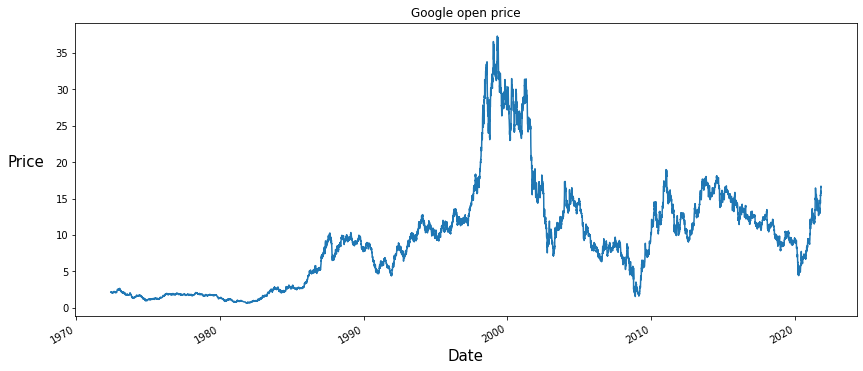

In [25]:
# Рассмотрим изменение цены
plt.figure(figsize=(14, 6))
plt.title('Google open price')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', rotation=0, labelpad=30, fontsize=15)
df['High'].plot();

In [26]:
df.shape

(12458, 1)

In [27]:
df = df.resample("M").mean()
df.shape

(593, 1)

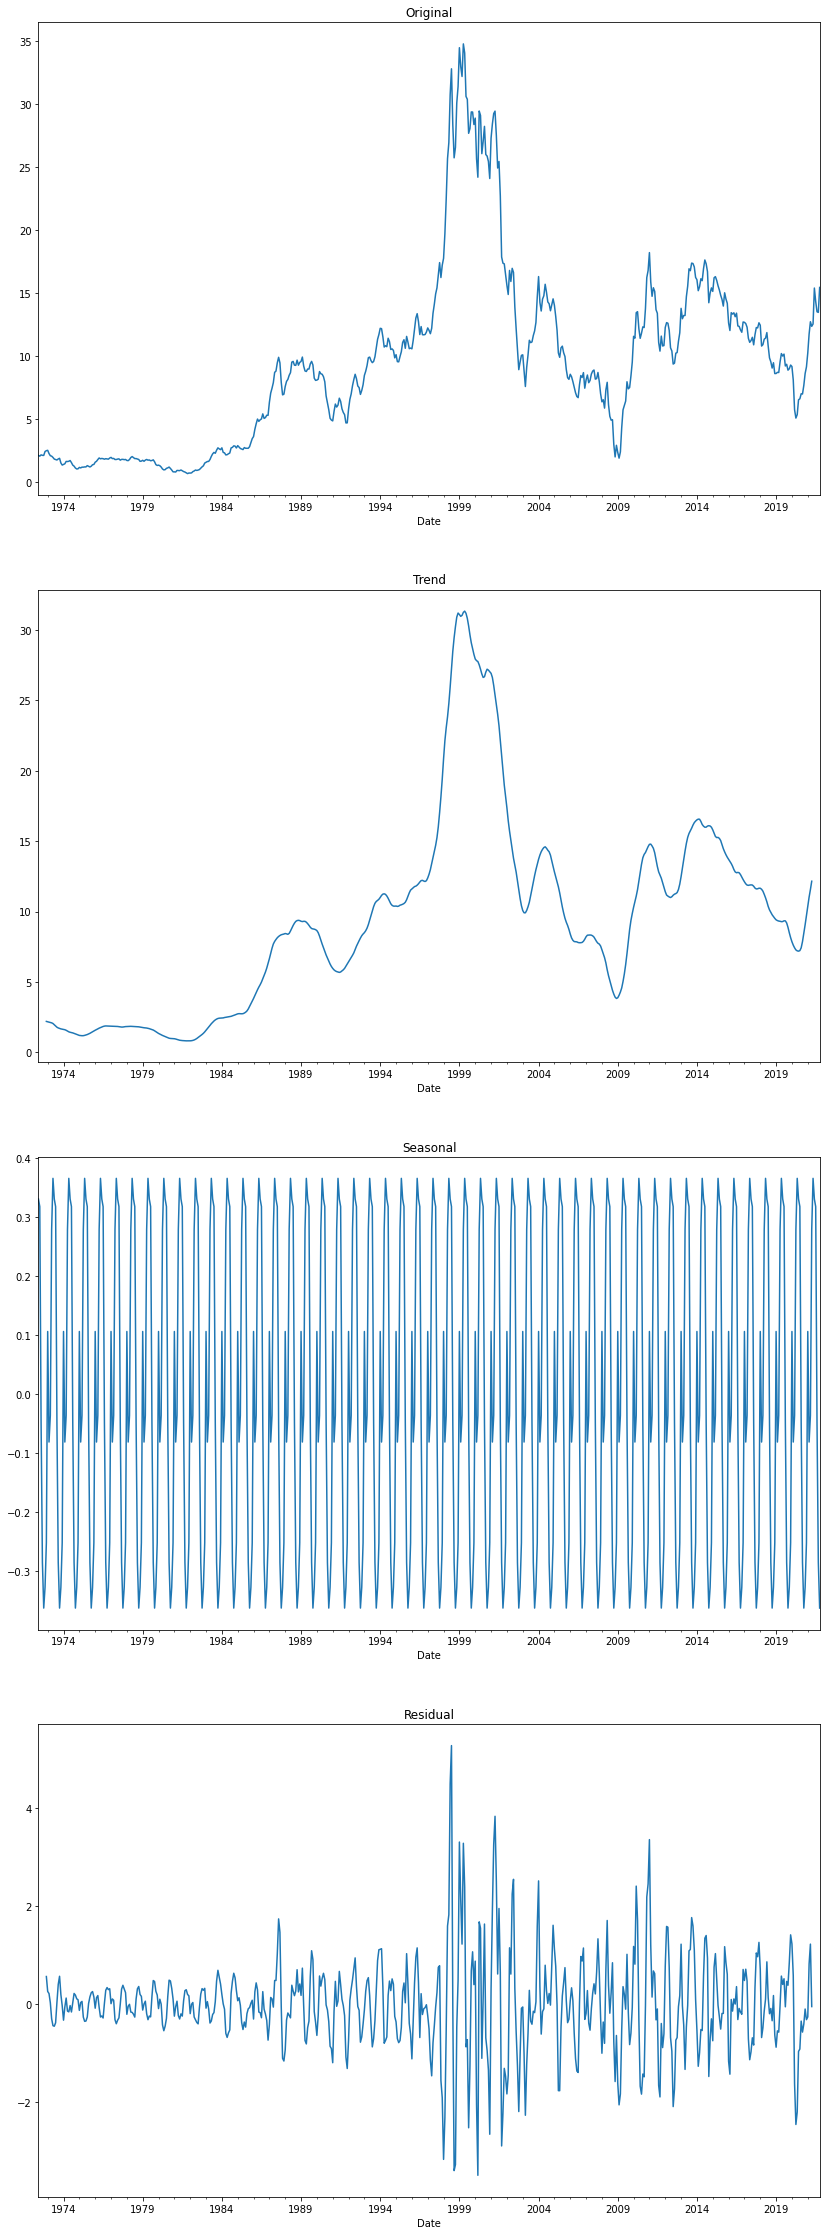

In [28]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Разложим ряд на компоненты и проверим ответы на вопросы

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(df[['High']], period=12)

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

In [29]:
p_value = adfuller(df['High'])[1]
print(df['High'])

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!'
)

Date
1972-06-30     2.127047
1972-07-31     2.071511
1972-08-31     2.171732
1972-09-30     2.136392
1972-10-31     2.128706
                ...    
2021-06-30    15.420455
2021-07-31    14.358095
2021-08-31    13.532727
2021-09-30    13.486667
2021-10-31    15.468750
Freq: M, Name: High, Length: 593, dtype: float64
Полученный уровень значимости (p-value): 0.2095. 0.2095 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!


Попробуем привести ряд к стационарному.


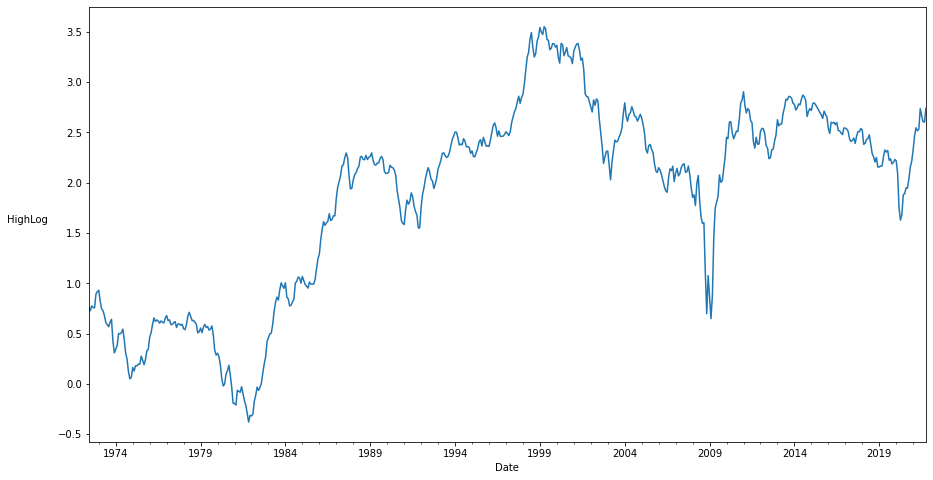

In [30]:
df['HighLog'] = np.log(df['High'])
plt.figure(figsize=(15, 8))
plt.ylabel('HighLog', rotation=0, labelpad=30)
df['HighLog'].plot();

In [31]:
p_value = adfuller(df['HighLog'][1:])[1]
print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.4829. 0.4829 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!


c:\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


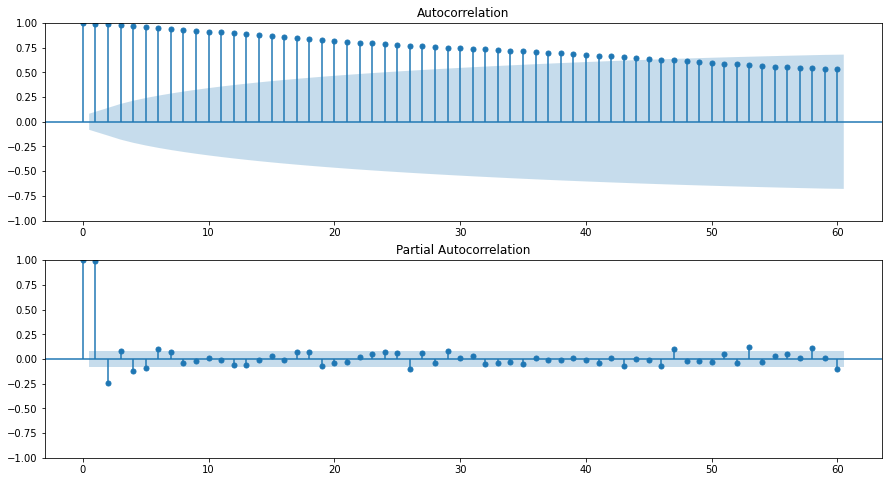

In [32]:
# Построим коррелограмму и проверим на наличие корреляции
plt.figure(figsize=(15,8))

ax = plt.subplot(211)
statsmodels.graphics.tsaplots.plot_acf(df['HighLog'][13:], lags=60, ax=ax)

ax = plt.subplot(212)
statsmodels.graphics.tsaplots.plot_pacf(df['HighLog'][13:], lags=60, ax=ax);
# Из графиков автокорреляции делаем вывод что ряд не стационарный

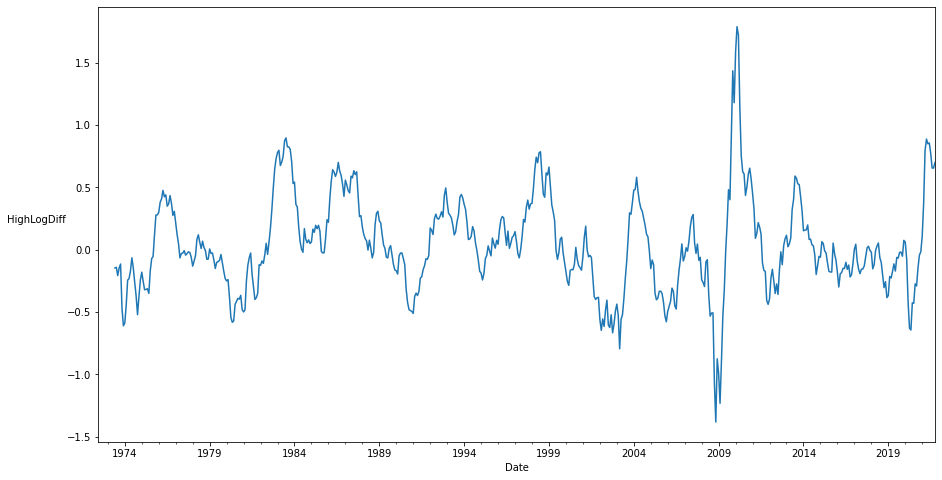

In [33]:
df['HighLogDiff'] = df['HighLog'].diff(12)

plt.figure(figsize=(15, 8))
plt.ylabel('HighLogDiff', rotation=0, labelpad=30)
df['HighLogDiff'].plot();


KeyError: 'HighLogDiffDiff'

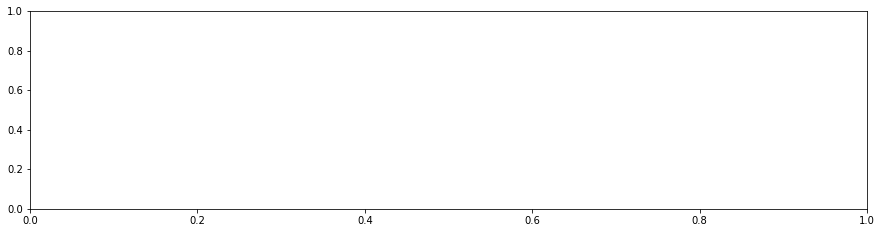

In [34]:
# Построим коррелограмму и проверим на наличие корреляции
plt.figure(figsize=(15,8))

ax = plt.subplot(211)
statsmodels.graphics.tsaplots.plot_acf(df['HighLog'][13:], lags=60, ax=ax)

ax = plt.subplot(212)
statsmodels.graphics.tsaplots.plot_pacf(df['HighLog'][13:], lags=60, ax=ax);
# Из графиков автокорреляции делаем вывод что ряд не стационарный

In [ ]:
p_value = adfuller(df['HighLogDiff'][12:])[1]
print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Нулевая гипотеза отвергнута в пользу альтернативной!'
)

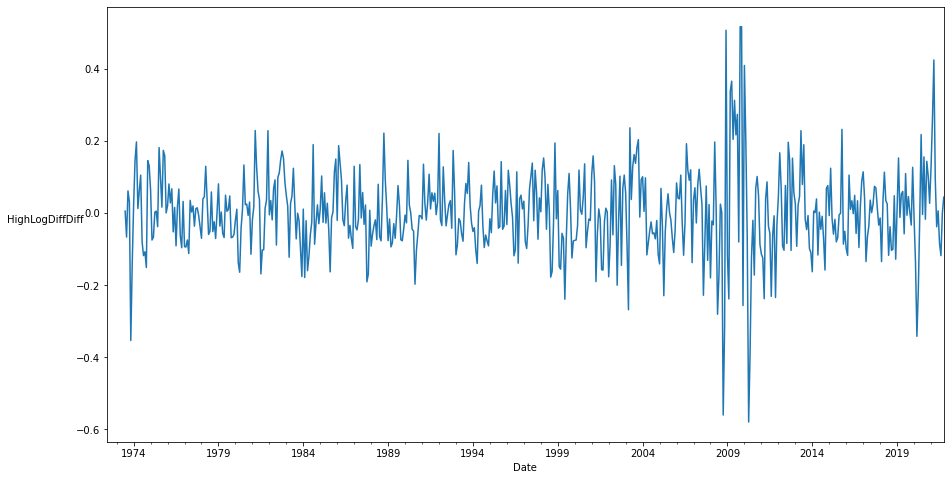

In [35]:
df['HighLogDiffDiff'] = df['HighLogDiff'].diff(1)

plt.figure(figsize=(15, 8))
plt.ylabel('HighLogDiffDiff', rotation=0, labelpad=30)
df['HighLogDiffDiff'].plot();


In [36]:
p_value = adfuller(df['HighLogDiffDiff'][13:])[1]
print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Нулевая гипотеза отвергнута в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.0. 0.0 > 0.05. Нулевая гипотеза отвергнута в пользу альтернативной!


c:\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


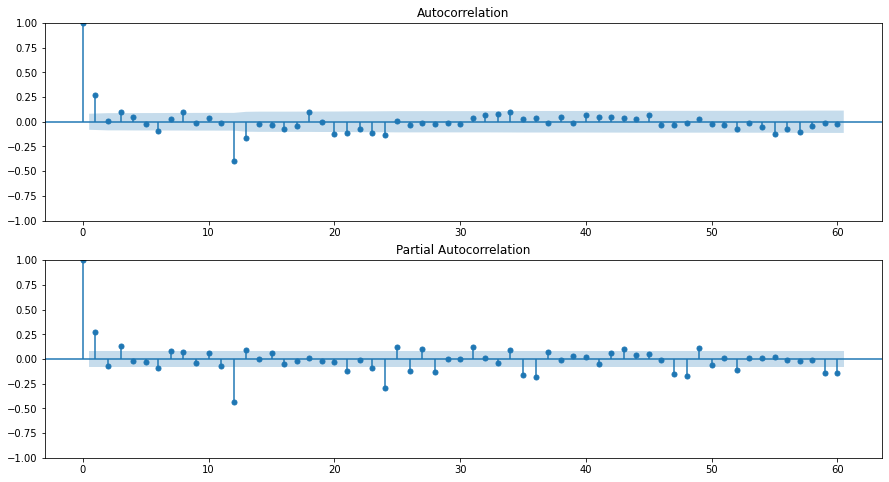

In [37]:
# Построим коррелограмму и проверим на наличие корреляции
plt.figure(figsize=(15,8))

ax = plt.subplot(211)
statsmodels.graphics.tsaplots.plot_acf(df['HighLogDiffDiff'][13:], lags=60, ax=ax)

ax = plt.subplot(212)
statsmodels.graphics.tsaplots.plot_pacf(df['HighLogDiffDiff'][13:], lags=60, ax=ax);
# Из графиков автокорреляции делаем вывод что ряд не стационарный

In [38]:
d=1
D=range(0,2)

qs = range(1, 5)
Qs = range(1, 3)

ps = range(1, 5)
Ps = range(3, 5)

In [39]:
from itertools import product
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

64

In [40]:
size = len(df.HighLog)
percentile = int(0.8 * size)

X_train = df['HighLogDiffDiff'][:percentile]
X_test = df['HighLogDiffDiff'][percentile:]
y_train = df['High'][:percentile]
y_test = df['High'][percentile:]

parameters = product(ps, qs, Ps, D, Qs)
parameters_list = list(parameters)
len(parameters_list)

128

In [41]:
import statsmodels.api as sm
from tqdm import tqdm

#warnings.filterwarnings('ignore')

results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    try:
        model = sm.tsa.statespace.SARIMAX(
            X_train,
            order=(param[0], d, param[1]),
            seasonal_order=(param[2], param[3], param[4], 6)
        ).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

  0%|          | 0/128 [00:00<?, ?it/s]c:\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  2%|▏         | 2/128 [00:10<10:35,  5.05s/it]c:\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  3%|▎         | 4/128 [00:25<14:12,  6.87s/it]c:\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  4%|▍         | 5/128 [00:31<13:53,  6.77s/it]c:\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

In [42]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

          parameters         aic
69   (3, 1, 4, 0, 2) -926.483500
109  (4, 2, 4, 0, 2) -924.916569
125  (4, 4, 4, 0, 2) -924.373031
13   (1, 2, 4, 0, 2) -923.115652
101  (4, 1, 4, 0, 2) -922.893869


In [43]:
print(best_model.summary())

                                       SARIMAX Results                                        
Dep. Variable:                        HighLogDiffDiff   No. Observations:                  474
Model:             SARIMAX(3, 1, 1)x(4, 0, [1, 2], 6)   Log Likelihood                 474.242
Date:                                Wed, 01 Dec 2021   AIC                           -926.484
Time:                                        19:11:44   BIC                           -880.733
Sample:                                    06-30-1972   HQIC                          -908.489
                                         - 11-30-2011                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3483      0.035      9.896      0.000       0.279       0.417
ar.

In [45]:
fittedVal = best_model.fittedvalues;
fittedVal.head(15)

Date
1972-06-30    0.000000
1972-07-31    0.000000
1972-08-31    0.000000
1972-09-30    0.000000
1972-10-31    0.000000
1972-11-30    0.000000
1972-12-31    0.000000
1973-01-31    0.000000
1973-02-28    0.000000
1973-03-31    0.000000
1973-04-30    0.000000
1973-05-31    0.000000
1973-06-30    0.000000
1973-07-31    0.000000
1973-08-31    0.005649
Freq: M, dtype: float64

In [59]:
fittedVal[12] = df['HighLogDiff'][12]

fittedValCumSum = fittedVal.cumsum(skipna = True)

for i in range(0, 12):
    fittedValCumSum[i] = df['HighLog'][i]

fittedValCumSumCumSum = fittedValCumSum.cumsum(skipna = True)

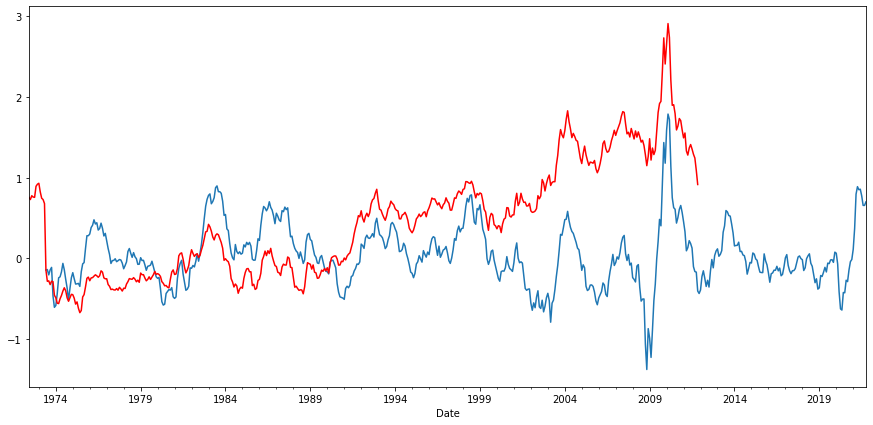

In [62]:
import numpy as np

y_train_pred = fittedValCumSum;

plt.figure(figsize=(15,7))

df['HighLogDiff'].plot()
y_train_pred.plot(c='r');

In [ ]:
predict_len = size - percentile

predictVal = best_model.predict(start=percentile, end=percentile + predict_len - 1)

predictVal[12] = df['HighLogDiff'][percentile + 12]

predictValCumSum = predictVal.cumSum(skipna = True)

for i in range(0, 12):
    predictValCumSum[i] = df['HighLog'][percentile + i]

predictValCumSumCumSum = fittedValCumSum.cumSum(skipna = True)

<AxesSubplot:xlabel='Date'>

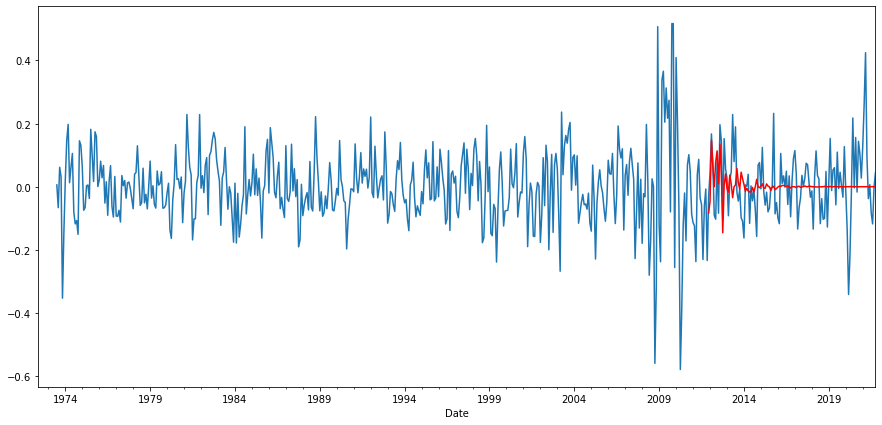

In [49]:
predict_len = size - percentile
y_pred = best_model.predict(start=percentile, end=percentile + predict_len - 1)

plt.figure(figsize=(15,7))
df['HighLogDiffDiff'].plot()
y_pred.plot(c='r')

In [57]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_pred, y_test)

0.25242138834381395